In [1]:
# import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import tensorflow as tf
import numpy as np

In [8]:
# import dataset
from tensorflow.keras.datasets import boston_housing

In [9]:
# adding in sql lite
import sqlite3

In [13]:
# create a connection to database
conn = sqlite3.connect('boston_housing.db')

In [14]:
# execute query 
query = 'SELECT name FROM sqlite_master WHERE type="table";'
table_names_df = pd.read_sql_query(query, conn)


In [15]:
# print table names 
print(table_names_df['name'])

Series([], Name: name, dtype: object)


In [16]:
# close connection
conn.close()

In [17]:
# load the data 
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [36]:
# The Boston Housing dataset contains information about housing 
# prices in the Boston area. It includes features such as crime rate, 
# average number of rooms per dwelling, and more. 

In [18]:
# import libraries 
from sklearn.model_selection import train_test_split

In [28]:
# split the data into 80% training and 20% test 
X_train, X_test, y_train, y_test = train_test_split(
    train_data, train_targets, test_size=0.2, random_state=42)

In [29]:
# print the shapes of the resulting datasets. 
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training targets shape: {y_train.shape}")
print(f"Test targets shape: {y_test.shape}")

Training data shape: (323, 13)
Test data shape: (81, 13)
Training targets shape: (323,)
Test targets shape: (81,)


In [40]:
# training data shape describes the number of samples (data points) and the number
# of features (variables) in the training dataset. 
# we have 323 houses and 13 features for each house in this dataset. 

In [41]:
# test data shape 
# refers to the dimensions or structure of the dataset used for evaluating
# the performance of a machine learning model. 
# we have 81 samples (houses) and 13 features (variables) 
# the 13 features are represented as columns in a tabular dataset. 

In [21]:
# import 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

# create a sequential model 
model = Sequential()

In [22]:
# add layers to the model 
model.add(Dense(units=64, activation='relu', input_shape=(13,))) # input layer # 13 because data has 13 features
model.add(Dense(units=32, activation='relu')) # hidden layer
model.add(Dense(units=1)) # output layer # chose 1 because performing regression # no activation function because its a regression task

In [23]:
# compile the model 
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
# optimizer = adam 
# loss function is the mean squared error (MSE). this measures the average
# squared difference between the predicted values and the actual target values
# metrics = MAE which stands for mean absolute error. MAE represents the 
# average absolute difference between predicted and actual values. 

In [24]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# train the model using the training data 
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
                    verbose=1)

# evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test)

Epoch 1/100


9/9 [==============================] - 2s 44ms/step - loss: 787.9500 - mae: 23.5189 - val_loss: 222.4841 - val_mae: 11.7757
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 136.4230 - mae: 8.5740 - val_loss: 128.5590 - val_mae: 8.1007
Epoch 3/100
9/9 [==============================] - 0s 10ms/step - loss: 135.0061 - mae: 9.3193 - val_loss: 105.9967 - val_mae: 8.6088
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 98.1919 - mae: 7.7255 - val_loss: 87.7947 - val_mae: 6.3598
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 79.7687 - mae: 6.5031 - val_loss: 85.8554 - val_mae: 6.7331
Epoch 6/100
9/9 [==============================] - 0s 18ms/step - loss: 78.9158 - mae: 6.1312 - val_loss: 80.6902 - val_mae: 6.3129
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 72.7440 - mae: 6.3684 - val_loss: 76.9420 - val_mae: 5.9020
Epoch 8/100
9/9 [==============================] - 0s 11ms/step - lo

In [26]:
# print results 
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Mean Absolute Error (MAE): {test_mae:.4f}")

Test Loss: 31.5526
Test Mean Absolute Error (MAE): 4.2804


Epoch 1/100
9/9 [==============================] - 0s 19ms/step - loss: 32.2477 - mae: 4.0974 - val_loss: 36.4472 - val_mae: 4.5279
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 32.0696 - mae: 4.0589 - val_loss: 35.5209 - val_mae: 4.2739
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 32.7864 - mae: 4.1954 - val_loss: 35.2088 - val_mae: 4.0698
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 33.7231 - mae: 4.2054 - val_loss: 44.8833 - val_mae: 5.4471
Epoch 5/100
9/9 [==============================] - 0s 17ms/step - loss: 35.6431 - mae: 4.5415 - val_loss: 36.2389 - val_mae: 4.4477
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 35.1011 - mae: 4.3967 - val_loss: 35.7869 - val_mae: 4.1227
Epoch 7/100
9/9 [==============================] - 0s 10ms/step - loss: 35.2011 - mae: 4.4750 - val_loss: 43.0579 - val_mae: 4.5470
Epoch 8/100
9/9 [==============================] - 0s 10ms/step - loss: 37.7262

<function matplotlib.pyplot.show(close=None, block=None)>

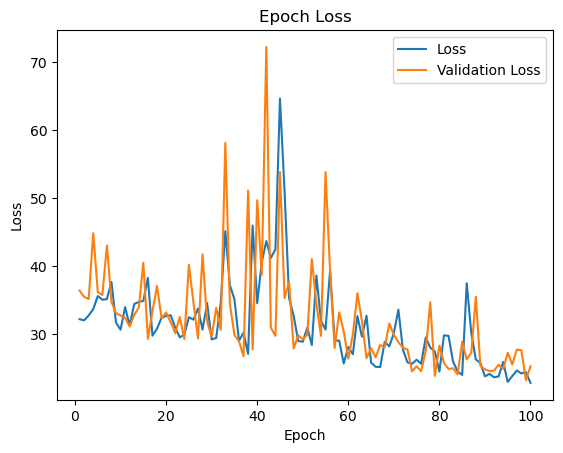

In [27]:
# graph 

hist = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

figure = plt.gcf()

plt.title('Epoch Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss'])+1), hist.history['loss']),
plt.plot(range(1, len(hist.history['val_loss'])+1), hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show

